<a href="https://colab.research.google.com/github/Salonee-Jain/MLnow_2.0/blob/main/LinearRegression/Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for code illustration of the `ML.now()` course


`Univariate Linear Regression`

[Link to Download the dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Date Created**: June 6, 2021


**Author**:
 Saloni Jain 

**Reach out**:
[Email](https://www.google.com/intl/en-GB/gmail/about/#) | [GitHub](https://github.com/Salonee-Jain) | [LinkedIn](https://www.linkedin.com/in/saloni--jain/)

[[Course Repository](https://github.com/Salonee-Jain/MLnow_2.0)]

Feel free to check out my [blogs](https://saloni-jain.medium.com/) 

## Setup

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
cd '/content/drive/MyDrive/ML AI/Placement'

/content/drive/MyDrive/ML AI/Placement


In [15]:
ls

Placement_Data_Full_Class.csv


In [16]:
import os

In [19]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [24]:
Data = pd.read_csv('Placement_Data_Full_Class.csv') #load the csv file as dataframe

In [25]:
Data.head(10) #print the first ten rows of the dataframe

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


We are just going to consider the columns `mba_p`(MBA percentage) and `status`(is the candidate selected or no) for univariate linear regression

$status_i = mbap_i  \cdot \theta_1 + \theta_0$

In [53]:
print(f'status: {Data.status.unique()}')



status: ['Placed' 'Not Placed']


**Converting the categorical data to numeric data**

In [54]:
Data['status'] = Data['status'].apply({'Placed':1, 'Not Placed':2}.get)

In [55]:
uniData = Data[['mba_p', 'status']]
uniData.head(5)

,mba_p,status
0,58.80,1
1,66.28,1
2,57.80,1
3,59.43,2
4,55.50,1


In [56]:
uniData.to_csv('univariate_Data_2.csv')

In [57]:
ls

Placement_Data_Full_Class.csv  univariate_Data_2.csv


## Data visualization

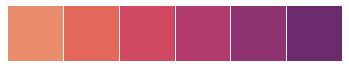

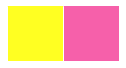

In [89]:
import seaborn as sns
sns.palplot(sns.color_palette("flare")) 
pal = sns.color_palette('flare', 6) #print 6 color shades from flare
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#ffff22', '#F660AA'] #blue and pink hex codes 
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [90]:
uniData.columns #columns in the dataframe


Index(['mba_p', 'status'], dtype='object')

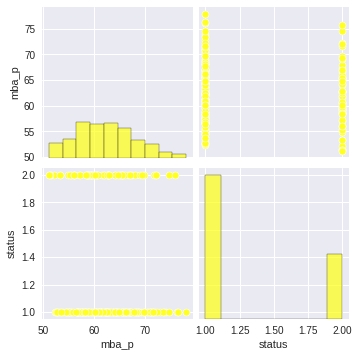

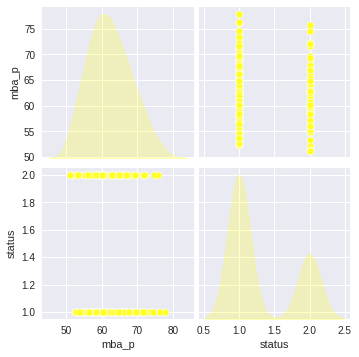

In [96]:
sns.pairplot(uniData,
             x_vars = ['mba_p', 'status'],
             y_vars =  ['mba_p', 'status'],
       diag_kind='auto'
             )

sns.pairplot(uniData,
             x_vars = ['mba_p', 'status'],
             y_vars =  ['mba_p', 'status'],
       diag_kind='kde'
             )

## Data Splits

In [63]:
#80-20 train-test percent split

trainDataset = uniData.sample(frac=0.89, random_state=0) 
testDataset = uniData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     mba_p  status
198  71.96       2
37   55.47       1
89   62.36       1
168  58.79       2
171  66.04       1
    mba_p  status
9   52.21       2
21  69.06       1
25  65.33       2
36  51.45       2
39  62.56       1


In [64]:
print(trainDataset.shape)
print(testDataset.shape)

(191, 2)
(24, 2)


In [65]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     mba_p  status
198  71.96       2
37   55.47       1
89   62.36       1
168  58.79       2
171  66.04       1
    mba_p  status
9   52.21       2
21  69.06       1
25  65.33       2
36  51.45       2
39  62.56       1


In [66]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('mba_p')
testLabels = testFeatures.pop('mba_p')

print(trainLabels.head())
print(testLabels.head())

198    71.96
37     55.47
89     62.36
168    58.79
171    66.04
Name: mba_p, dtype: float64
9     52.21
21    69.06
25    65.33
36    51.45
39    62.56
Name: mba_p, dtype: float64


In [67]:
print(trainFeatures.head())
print(testFeatures.head())

     status
198       2
37        1
89        1
168       2
171       1
    status
9        2
21       1
25       2
36       2
39       1


In [68]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [70]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [71]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
6/6 [==============================] - 1s 31ms/step - loss: 61.2504 - mae: 61.2504 - mse: 3785.6233 - val_loss: 60.4119 - val_mae: 60.4119 - val_mse: 3686.3367
Epoch 2/300
6/6 [==============================] - 0s 5ms/step - loss: 61.2365 - mae: 61.2365 - mse: 3783.9248 - val_loss: 60.3987 - val_mae: 60.3987 - val_mse: 3684.7390
Epoch 3/300
6/6 [==============================] - 0s 4ms/step - loss: 61.2226 - mae: 61.2226 - mse: 3782.2222 - val_loss: 60.3854 - val_mae: 60.3854 - val_mse: 3683.1414
Epoch 4/300
6/6 [==============================] - 0s 5ms/step - loss: 61.2086 - mae: 61.2086 - mse: 3780.5183 - val_loss: 60.3722 - val_mae: 60.3722 - val_mse: 3681.5449
Epoch 5/300
6/6 [==============================] - 0s 4ms/step - loss: 61.1948 - mae: 61.1948 - mse: 3778.8291 - val_loss: 60.3589 - val_mae: 60.3589 - val_mse: 3679.9480
Epoch 6/300
6/6 [==============================] - 0s 4ms/step - loss: 61.1808 - mae: 61.1808 - mse: 3777.1145 - val_loss: 60.3457 - val_mae: 60

In [77]:
print(history)

In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


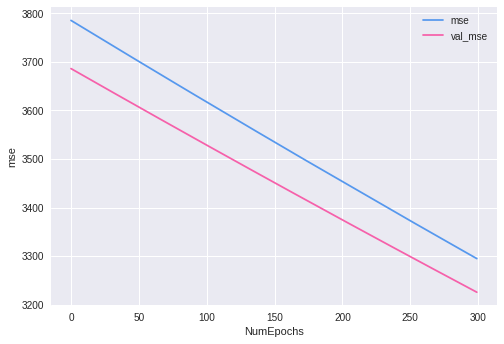

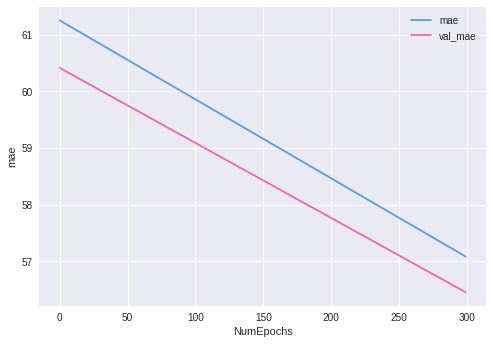

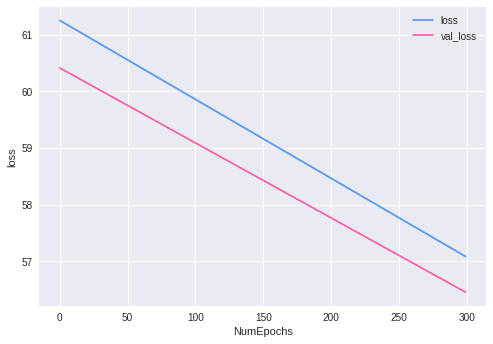

In [79]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [80]:
model.predict([1])

array([[4.4469895]], dtype=float32)

In [83]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[4.4469895]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[ 4.4469895]
 [ 7.0939507]
 [ 9.740912 ]
 [12.387874 ]
 [15.034835 ]]

List of Predictions (flattened out):
[ 4.4469895  7.0939507  9.740912  12.387874  15.034835 ]



In [84]:
print(testFeatures)

     status
9         2
21        1
25        2
36        2
39        1
47        1
58        1
67        1
70        1
77        1
81        1
87        2
88        1
103       1
117       1
140       1
165       2
172       1
174       1
192       1
193       1
195       1
202       1
204       1


In [85]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [86]:
print(len(testPreds))
print(testPreds)

24
[7.0939507 4.4469895 7.0939507 7.0939507 4.4469895 4.4469895 4.4469895
 4.4469895 4.4469895 4.4469895 4.4469895 7.0939507 4.4469895 4.4469895
 4.4469895 4.4469895 7.0939507 4.4469895 4.4469895 4.4469895 4.4469895
 4.4469895 4.4469895 4.4469895]


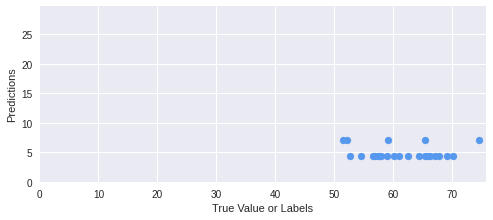

In [87]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

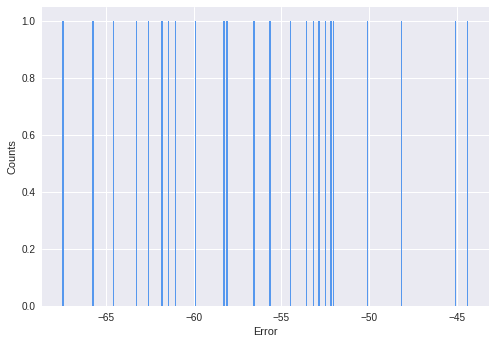

In [88]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

Note: 


Validation loss `val_loss` is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

- Hyperparameter tuning --> `numEpochs`, `optimizer`, `learning_rate`, lossFunctions